## René Parlange, MSc
### 📚 Machine Learning Course, PhD in Computer Science
#### 🎓 Instructor: Juan Carlos Cuevas Tello, PhD
#### 🏛 Universidad Autónoma de San Luis Potosí (UASLP)

🔗 [GitHub Repository](https://github.com/parlange/ml-notebooks)

# Kernel regression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/"

import csv
import os

def convert_dat_to_csv(file_path, csv_file_path, num_columns):
    # Ensure the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    # Open the source .dat file and the target .csv file
    with open(file_path, 'r') as dat_file, open(csv_file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Read each line in the .dat file
        for line in dat_file:
            # Split the line into a list at each space
            columns = line.split()
            # Check if there are at least the required number of columns on this line
            if len(columns) >= num_columns:
                # Write the specified number of columns into the .csv file
                csv_writer.writerow(columns[:num_columns])

# File paths and desired number of columns
files_info = [
    ('/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-0-1-N-0_v2.dat', 3),
    ('/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-1-1-N-1_v2.dat', 2),
    ('/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-5-1-N-3_v2.dat', 2)
]

# Convert each file
for file_path, num_columns in files_info:
    csv_file_path = file_path.replace('.dat', '.csv')
    convert_dat_to_csv(file_path, csv_file_path, num_columns)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
DS-5-1-GAP-0-1-N-0_v2.csv  DS-5-1-GAP-1-1-N-1_v2.dat  DS-5-1-GAP-5-1-N-3_v2.dat     plots
DS-5-1-GAP-0-1-N-0_v2.dat  DS-5-1-GAP-5-1-N-0_v2.csv  kernel_method.ipynb
DS-5-1-GAP-1-1-N-1_v2.csv  DS-5-1-GAP-5-1-N-3_v2.csv  kernel_method_original.ipynb


In [ ]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.linalg import pinvh
from sklearn.kernel_approximation import RBFSampler

DATA_PATH_TRUE = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-5-1-N-3_v2.csv'

DATA_PATH_NOISE = DATA_PATH_NOISE2

d_true = pd.read_csv(DATA_PATH_TRUE,header=None)
d_noise1 = pd.read_csv(DATA_PATH_NOISE1,header=None)
d_noise2 = pd.read_csv(DATA_PATH_NOISE2,header=None)


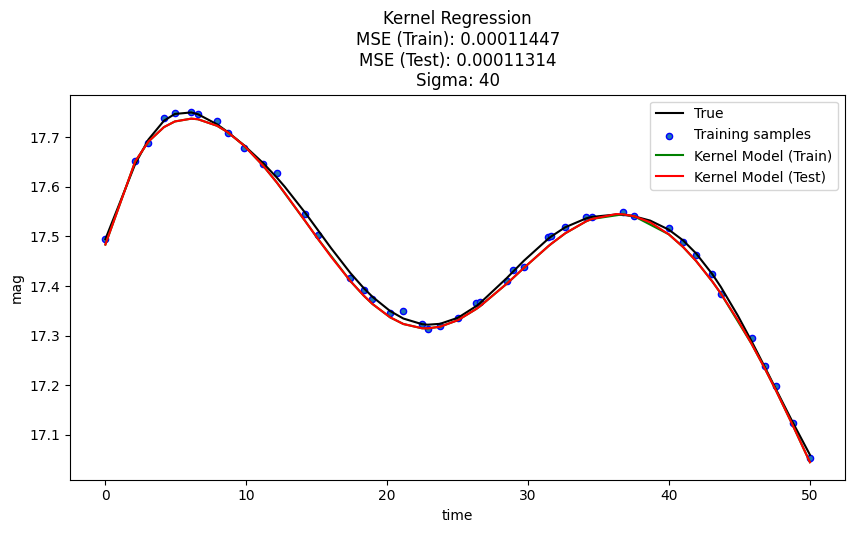

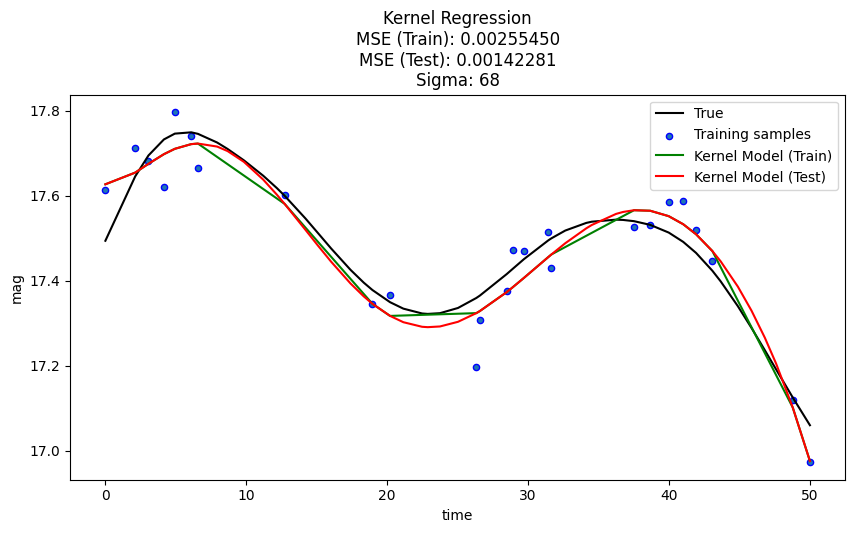

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math as m

# Function to compute the Gaussian kernel matrix
def gaussian_kernel_matrix(x1, x2, sigma):
    gram_matrix = np.zeros((x1.shape[0], x2.shape[0]))
    for i in range(x1.shape[0]):
        for j in range(x2.shape[0]):
            squared_distance = (x1[i] - x2[j])**2
            gram_matrix[i, j] = m.exp(-squared_distance / (2 * sigma**2))  ## Gaussian Kernel has denominator 2 ##
    return gram_matrix

# Function to perform kernel regression and plot results
def kernel_regression_and_plot(X_train, Y_train, X_test, Y_test, sigma):
    gram_matrix_train = gaussian_kernel_matrix(X_train, X_train, sigma)
    pinv_gram_matrix_train = np.linalg.pinv(gram_matrix_train)
    alpha = pinv_gram_matrix_train @ Y_train  # numpy docs recommend @ operator

    h_train = gram_matrix_train @ alpha
    gram_matrix_test = gaussian_kernel_matrix(X_test, X_train, sigma)
    h_test = gram_matrix_test @ alpha

    # Compute metrics
    mse_train = mean_squared_error(Y_train, h_train)
    mse_test = mean_squared_error(Y_test, h_test)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(X_test, Y_test, color='k', label="True")
    plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
    plt.plot(X_train, h_train, color='g', label="Kernel Model (Train)")
    plt.plot(X_test, h_test, color='r', label="Kernel Model (Test)")
    plt.xlabel("time")
    plt.ylabel("mag")
    plt.title(f"Kernel Regression\nMSE (Train): {mse_train:.8f}\nMSE (Test): {mse_test:.8f}\nSigma: {sigma}")
    plt.legend()
    plt.show()

# call regression and plot function
kernel_regression_and_plot(d_noise1[0].values.reshape(-1, 1), d_noise1[1].values.reshape(-1, 1), d_true[0].values.reshape(-1, 1), d_true[1].values.reshape(-1, 1), sigma=40)
kernel_regression_and_plot(d_noise2[0].values.reshape(-1, 1), d_noise2[1].values.reshape(-1, 1), d_true[0].values.reshape(-1, 1), d_true[1].values.reshape(-1, 1), sigma=68)


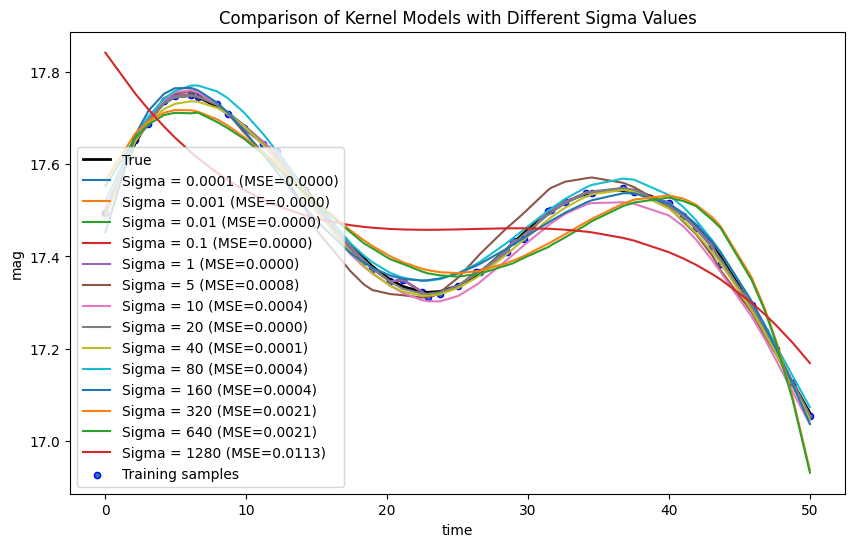

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sklearn.metrics import mean_squared_error

def K1(ex, n, c, km, d):
    matrix = [[m.exp(-(ex[j] - c[i])**2 / (2 * d**2)) for j in range(n)] for i in range(km)]
    return matrix

# Define the plotting function
def plot_sigma_comparison(X, Y, X_test, Y_test, sigma_values):
    x = X.values.reshape(-1,1)
    y = Y.values.reshape(-1,1)
    x_test = X_test.values.reshape(-1,1)
    y_test = Y_test.values.reshape(-1,1)

    plt.figure(figsize=(10, 6))
    plt.plot(x_test, y_test, color='k', lw=2, label="True")

    for sigma in sigma_values:
        # Compute the Gram matrix
        Gram_matrix = K1(X, X.size, X, X.size, sigma)
        Gram_matrix_M = np.asarray(Gram_matrix)
        pinvGram_matrix_M = np.linalg.pinv(Gram_matrix_M.T)

        # Calculate alpha and the model h
        alpha = pinvGram_matrix_M.dot(Y)
        h = Gram_matrix_M.T.dot(alpha)

        # Flatten the arrays for plotting
        hArray = np.squeeze(np.asarray(h))

        # Compute metrics
        MSE_train = mean_squared_error(y, hArray)

        # Plot
        plt.plot(X, hArray, label=f"Sigma = {sigma} (MSE={MSE_train:.4f})")

    plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
    plt.xlabel("time")
    plt.ylabel("mag")
    plt.legend(loc="best")
    plt.title("Comparison of Kernel Models with Different Sigma Values")
    plt.show()

# List of sigma values to explore
sigma_values = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 80, 160, 320, 640, 1280]

plot_sigma_comparison(d_noise1[0], d_noise1[1], d_true[0], d_true[1], sigma_values)


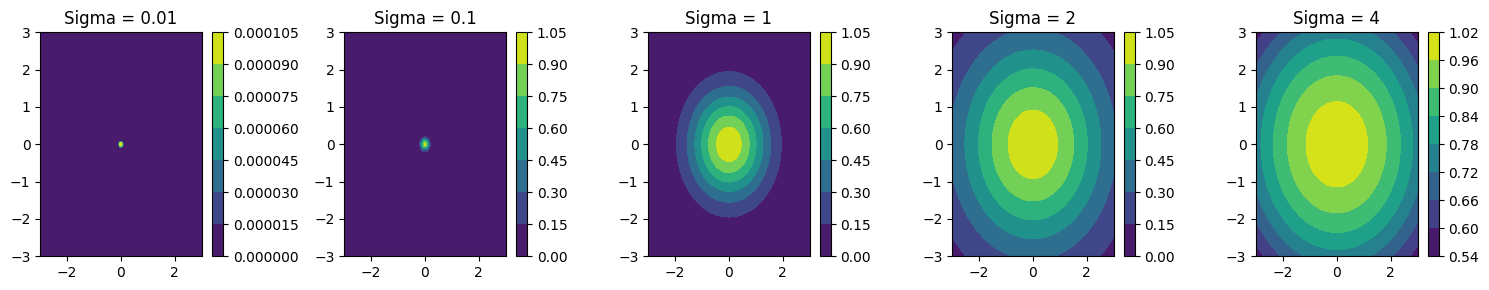

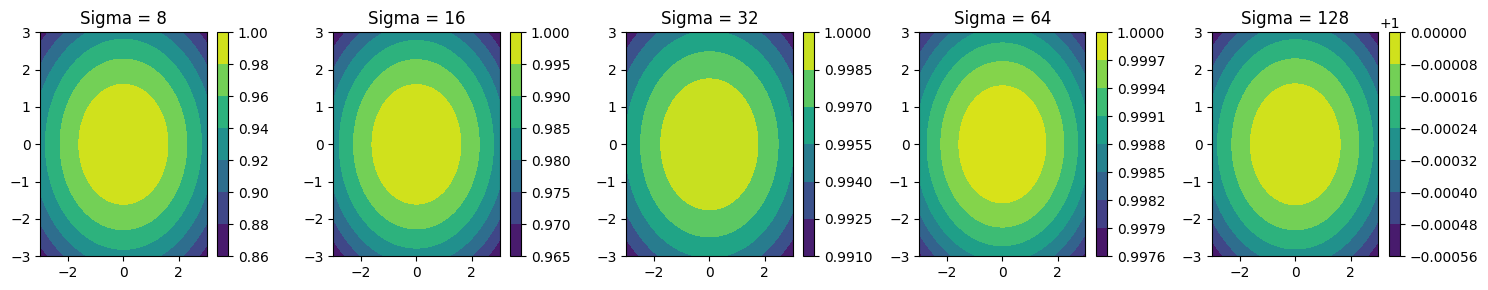

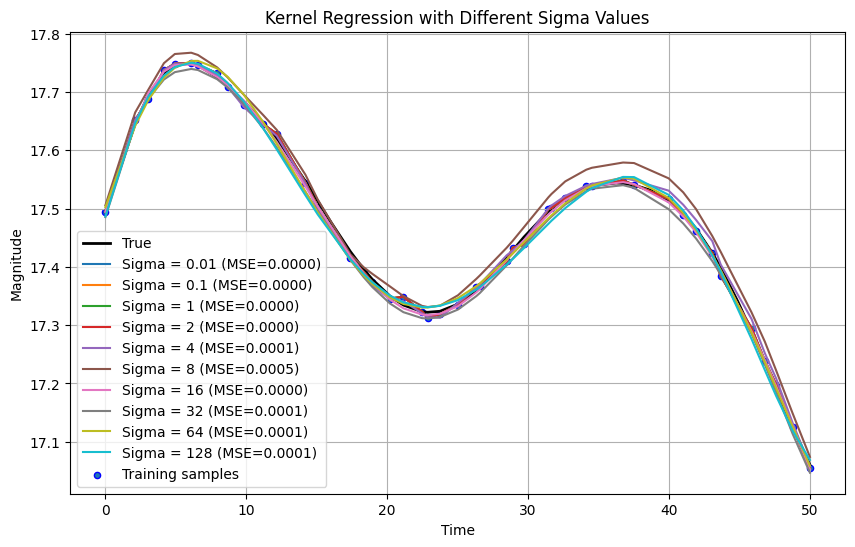

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import cm

# Define the Gaussian kernel function
def K1(x, y, sigma):
    """Calculate the Gaussian kernel for each pair of points x and y."""
    return np.exp(-((x - y)**2) / (2 * sigma**2))

def fit_predict(X, Y, sigma):
    """Fit and predict using the Gaussian kernel for the given sigma value."""
    # Create the Gram matrix
    Gram_matrix = np.array([[K1(x_i, x_j, sigma) for x_j in X] for x_i in X])
    # Compute the pseudoinverse of the Gram matrix
    pinvGram_matrix = np.linalg.pinv(Gram_matrix)
    # Calculate the weights (alpha)
    alpha = pinvGram_matrix @ Y
    # Predict the output
    predictions = Gram_matrix @ alpha
    return predictions

# Plot function for the Gaussian contours
def plot_gaussian_contours(sigma_values):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    fig, axes = plt.subplots(1, len(sigma_values), figsize=(15, 3))

    for ax, sigma in zip(axes, sigma_values):
        Z = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
        contour = ax.contourf(X, Y, Z, cmap=cm.viridis)
        ax.set_title(f'Sigma = {sigma}')
        fig.colorbar(contour, ax=ax)

    plt.tight_layout()
    plt.show()

# Plot function for the kernel regression
def plot_kernel_regression(X, Y, X_test, Y_test, sigma_values):
    plt.figure(figsize=(10, 6))
    plt.plot(X_test, Y_test, color='k', lw=2, label="True")

    for sigma in sigma_values:
        predictions = fit_predict(X, Y, sigma)
        MSE_train = mean_squared_error(Y, predictions)
        plt.plot(X, predictions, label=f"Sigma = {sigma} (MSE={MSE_train:.4f})")

    plt.scatter(X, Y, edgecolor='b', s=20, label="Training samples")
    plt.xlabel("Time")
    plt.ylabel("Magnitude")
    plt.legend(loc="best")
    plt.title("Kernel Regression with Different Sigma Values")
    plt.grid(True)
    plt.show()

# Example sigma values for demonstration
sigma_valuesLow = [0.01, 0.1, 1, 2, 4]
sigma_valuesHigh = [8, 16, 32, 64, 128]
sigma_values = sigma_valuesLow+sigma_valuesHigh

# Plot Gaussian contours
# plot_gaussian_contours(sigma_values)
plot_gaussian_contours(sigma_valuesLow)
plot_gaussian_contours(sigma_valuesHigh)

# Ensure d_noise1 and d_true are loaded as numpy arrays
plot_kernel_regression(d_noise1[0].values, d_noise1[1].values, d_true[0].values, d_true[1].values, sigma_values)


The following code will generate a series of 3D plots, each corresponding to one of the sigma values specified in sigma_values. Each plot will show the Gaussian kernel values for a range of x and y distances, illustrating how the choice of sigma affects the steepness and reach of the kernel function. The gaussian_kernel function calculates the kernel value for a pair of points, and plot_3d_kernel_effect creates the 3D surface plots. Adjust the sigma_values list as needed for your specific use case.

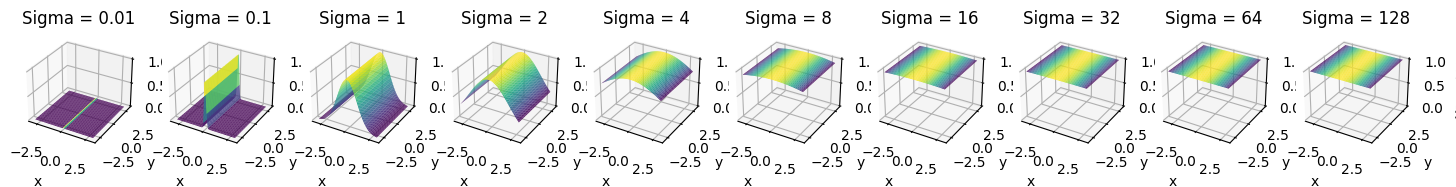

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian kernel function as before
def gaussian_kernel(x, y, sigma):
    return np.exp(-((x - y) ** 2) / (2 * sigma ** 2))

# Create the 3D plot
def plot_3d_kernel_effect(sigma_values):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(18, 4))

    for i, sigma in enumerate(sigma_values, start=1):
        Z = gaussian_kernel(X, 0, sigma)
        ax = fig.add_subplot(1, len(sigma_values), i, projection='3d')
        ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none')
        ax.set_title(f'Sigma = {sigma}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Kernel Value')
        ax.set_zlim(0, 1)

    plt.show()

# sigma values
sigma_valuesLow = [0.01, 0.1, 1, 2, 4]
sigma_valuesHigh = [8, 16, 32, 64, 128]
sigma_values = sigma_valuesLow+sigma_valuesHigh

plot_3d_kernel_effect(sigma_values)


To visualize a Gaussian kernel and how it represents data in kernel methods, we can plot the Gaussian distribution in 3D to show the individual kernels and how they might combine to form a mixture. Kernel methods use the properties of Gaussian functions to project data into a higher-dimensional space where it's easier to model complex relationships.

Here's a code snippet to visualize a set of Gaussian kernels positioned at different data points on a 2D plane, showing how they might combine:


This code will create a 3D plot with several Gaussian distributions placed at the locations specified in data_points. By adjusting the sigma value, you can see how spread out each Gaussian is. The transparency of each Gaussian surface is reduced to visualize overlaps, which indicates how these kernels combine to represent the data in the space where kernel methods operate.

If you want to see the combined effect of these kernels, you would sum the individual Gaussian functions, which can be another way to visualize how kernel methods use a mixture of Gaussians. The above code can be adapted to sum the Z values for each data point before plotting to see the combined Gaussian mixture.

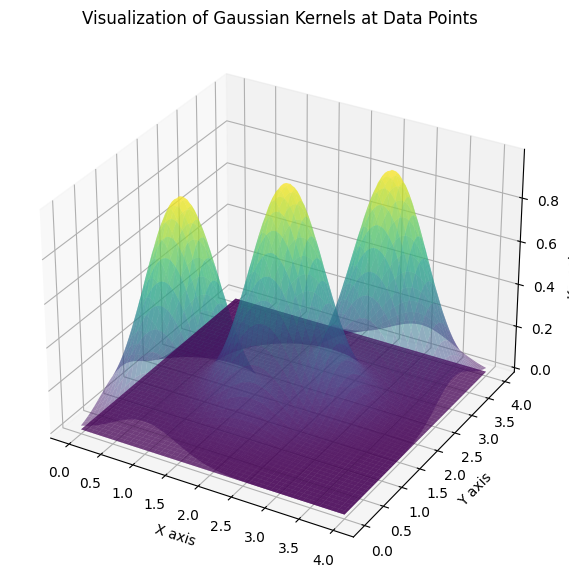

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# Define the Gaussian kernel function
def gaussian_kernel(x, y, x0, y0, sigma):
    return np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

# Generate data points where kernels are centered
data_points = np.array([[1, 1], [2, 2], [3, 3]])

# Define the grid for the plot
x = np.linspace(0, 4, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)

# Define sigma
sigma = 0.5

# Initialize the plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each Gaussian kernel
for data_point in data_points:
    Z = gaussian_kernel(X, Y, data_point[0], data_point[1], sigma)
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none', alpha=0.5)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Kernel value')
ax.set_title('Visualization of Gaussian Kernels at Data Points')

# Show the plot
plt.show()


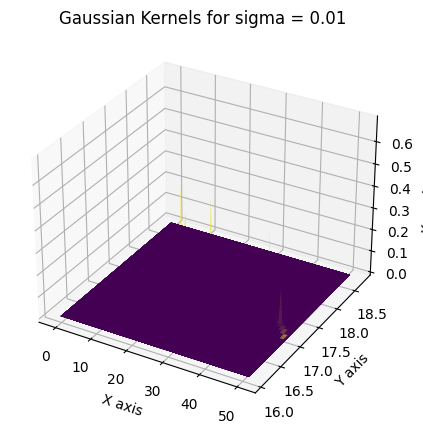

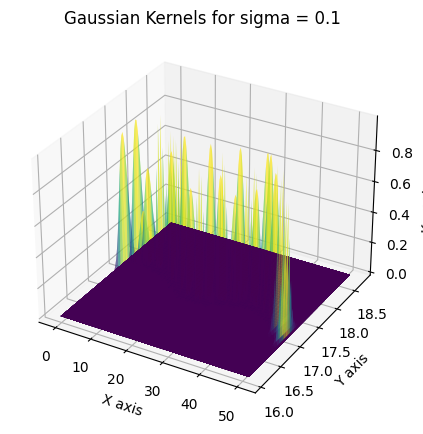

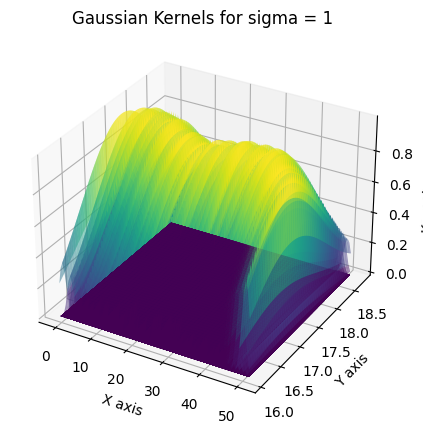

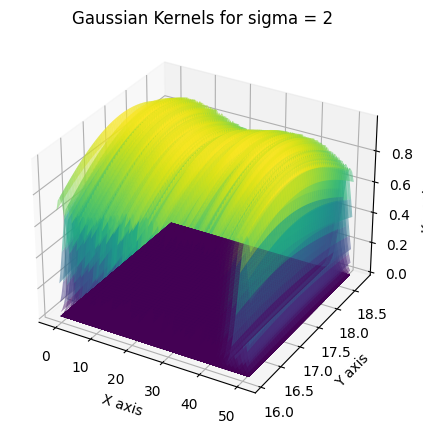

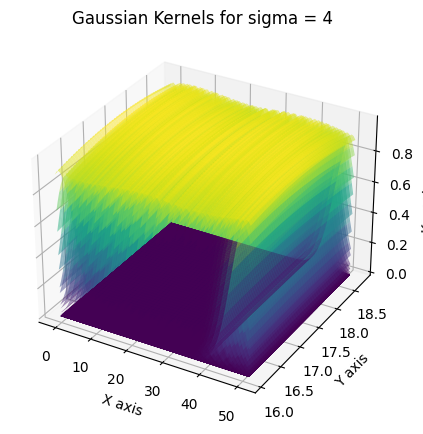

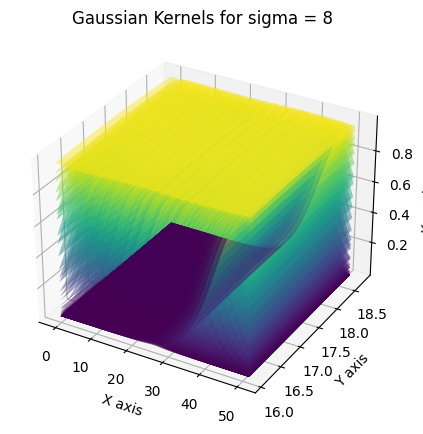

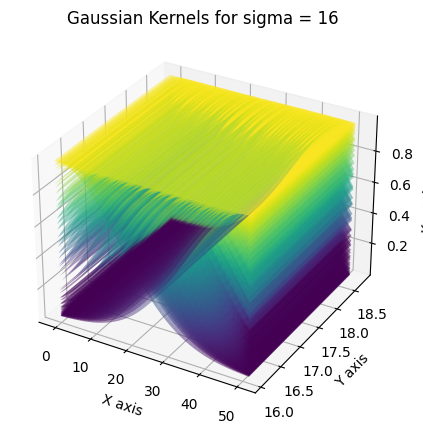

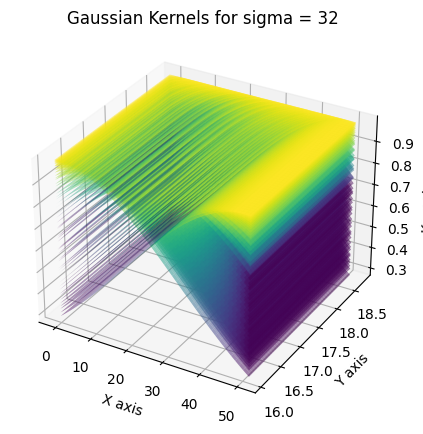

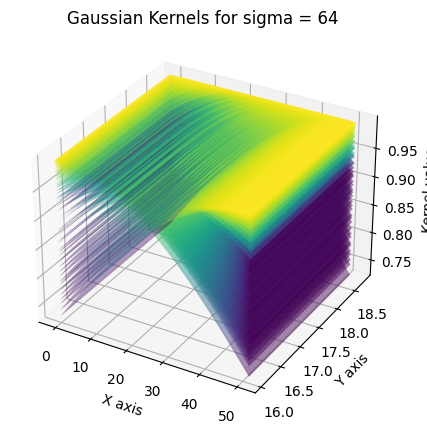

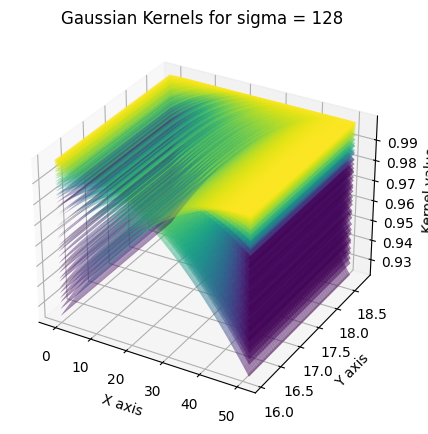

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd

# Function to read the data from CSV and return as numpy array
def read_data_from_csv(path):
    return pd.read_csv(path, header=None).values

# Define the Gaussian kernel function
def gaussian_kernel(x, y, x0, y0, sigma):
    return np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

# Load data points where kernels are centered
DATA_PATH_TRUE = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-0-1-N-0_v2.csv'
data_points = read_data_from_csv(DATA_PATH_TRUE)

# Define the grid for the plot
grid_size = 100
x = np.linspace(np.min(data_points[:, 0]) - 1, np.max(data_points[:, 0]) + 1, grid_size)
y = np.linspace(np.min(data_points[:, 1]) - 1, np.max(data_points[:, 1]) + 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define sigma values
sigma_valuesLow = [0.01, 0.1, 1, 2, 4]
sigma_valuesHigh = [8, 16, 32, 64, 128]
sigma_values = sigma_valuesLow + sigma_valuesHigh

# Plot Gaussian kernels for each sigma value
for sigma in sigma_values:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each Gaussian kernel
    for data_point in data_points:
        Z = gaussian_kernel(X, Y, data_point[0], data_point[1], sigma)
        ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none', alpha=0.5)

    # Set labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Kernel value')
    ax.set_title(f'Gaussian Kernels for sigma = {sigma}')

    # Show the plot
    plt.show()


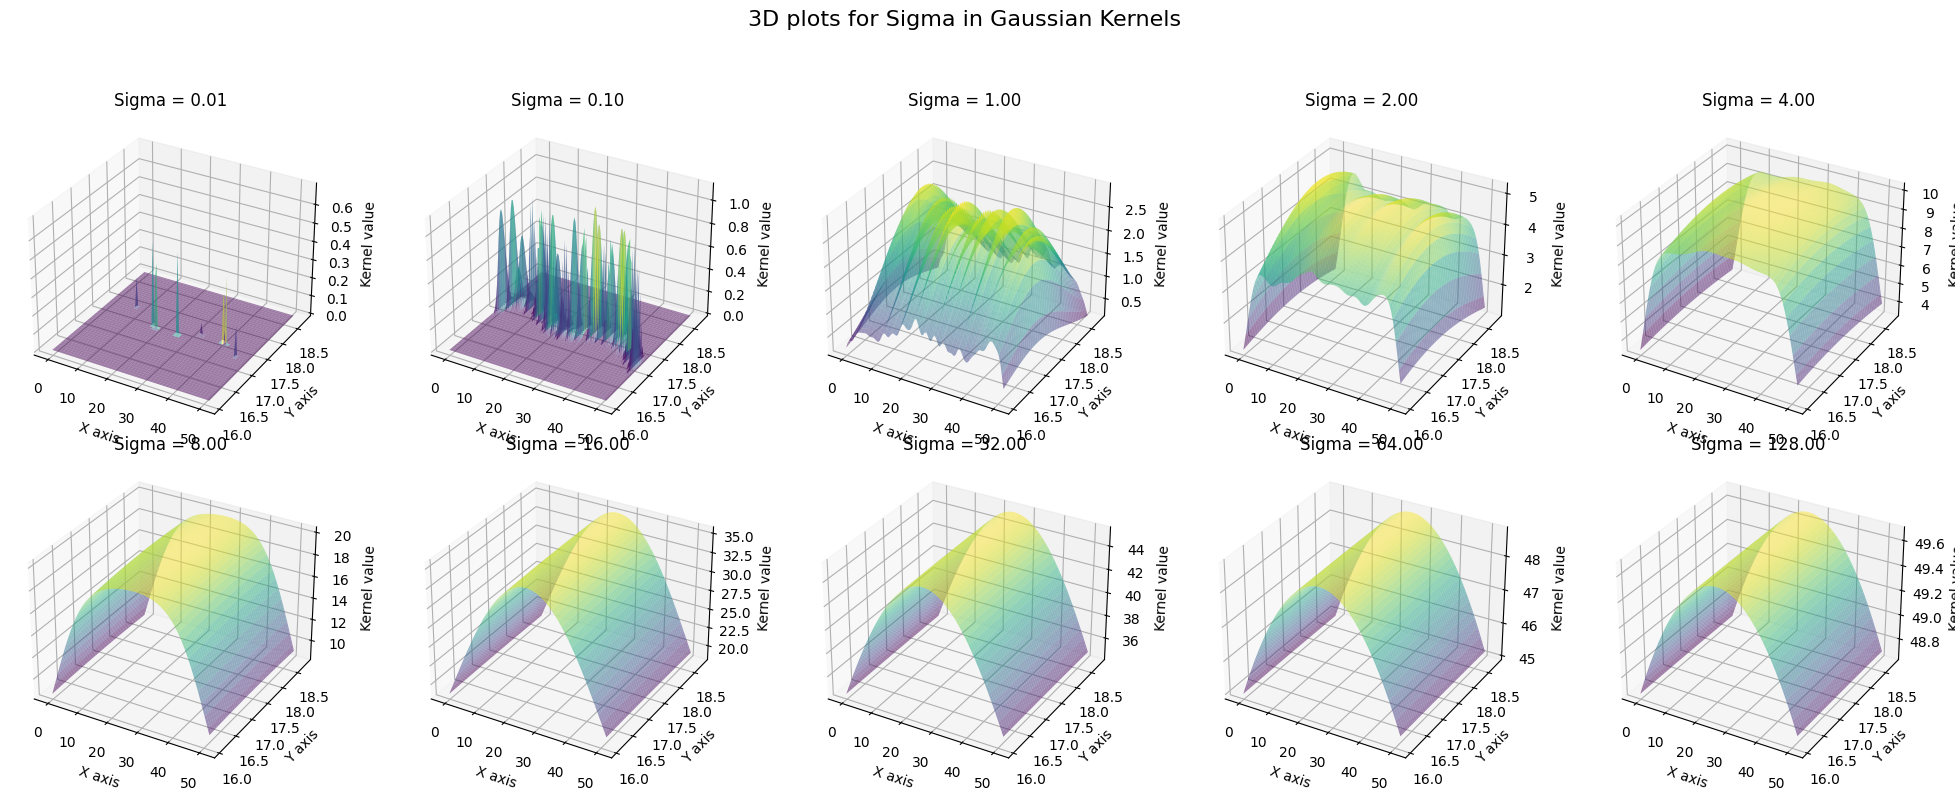

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd

# Function to read the data from CSV and return as numpy array
def read_data_from_csv(path):
    return pd.read_csv(path, header=None).values

# Define the Gaussian kernel function
def gaussian_kernel(x, y, x0, y0, sigma):
    return np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

# Load data points where kernels are centered
DATA_PATH_TRUE = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-0-1-N-0_v2.csv'
data_points = read_data_from_csv(DATA_PATH_TRUE)

# Define the grid for the plot
grid_size = 100
x = np.linspace(np.min(data_points[:, 0]) - 1, np.max(data_points[:, 0]) + 1, grid_size)
y = np.linspace(np.min(data_points[:, 1]) - 1, np.max(data_points[:, 1]) + 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define sigma values for the search
sigma_valuesLow = [0.01, 0.1, 1, 2, 4]
sigma_valuesHigh = [8, 16, 32, 64, 128]
sigma_values = sigma_valuesLow + sigma_valuesHigh

# Initialize plot
fig, axes = plt.subplots(2, 5, subplot_kw={'projection': '3d'}, figsize=(20, 8))
fig.suptitle('3D plots for Sigma in Gaussian Kernels', fontsize=16)

# Plot Gaussian kernels for each sigma value
for i, sigma in enumerate(sigma_values):
    ax = axes[i // 5, i % 5]

    # Sum up the kernels for visualization
    Z = np.zeros_like(X)
    for data_point in data_points:
        Z += gaussian_kernel(X, Y, data_point[0], data_point[1], sigma)

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none', alpha=0.5)

    # Set labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Kernel value')
    ax.set_title(f'Sigma = {sigma:.2f}')

# Adjust layout to prevent subplots from overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()


## Hyperparameter optimization (HPO)


### find best sigma, lowest MSE

Evaluating for noise1 dataset:
Sigma: 1e-05, Test MSE: 30.62056
Sigma: 2e-05, Test MSE: 30.62056
Sigma: 5e-05, Test MSE: 30.62056
Sigma: 0.0001, Test MSE: 30.62056
Sigma: 0.0002, Test MSE: 30.62056
Sigma: 0.0005, Test MSE: 30.62056
Sigma: 0.001, Test MSE: 30.62056
Sigma: 0.002, Test MSE: 30.62056
Sigma: 0.005, Test MSE: 30.62056
Sigma: 0.01, Test MSE: 30.62056
Sigma: 0.02, Test MSE: 30.62056
Sigma: 0.05, Test MSE: 30.62056
Sigma: 0.1, Test MSE: 30.62050
Sigma: 0.2, Test MSE: 29.81136
Sigma: 0.5, Test MSE: 16.74180
Sigma: 1, Test MSE: 0.72395
Sigma: 2, Test MSE: 0.00020
Sigma: 5, Test MSE: 0.00088
Sigma: 10, Test MSE: 0.00040
Sigma: 20, Test MSE: 0.00001
Sigma: 50, Test MSE: 0.00005
Sigma: 100, Test MSE: 0.00011
Sigma: 200, Test MSE: 0.00039
Sigma: 500, Test MSE: 0.00198
Sigma: 1000, Test MSE: 0.01067
Sigma: 2000, Test MSE: 0.01066
Sigma: 5000, Test MSE: 0.01383
Sigma: 10000, Test MSE: 0.01383
Sigma: 20000, Test MSE: 0.01383
Sigma: 50000, Test MSE: 0.01450
Sigma: 100000, Test MSE: 0.013

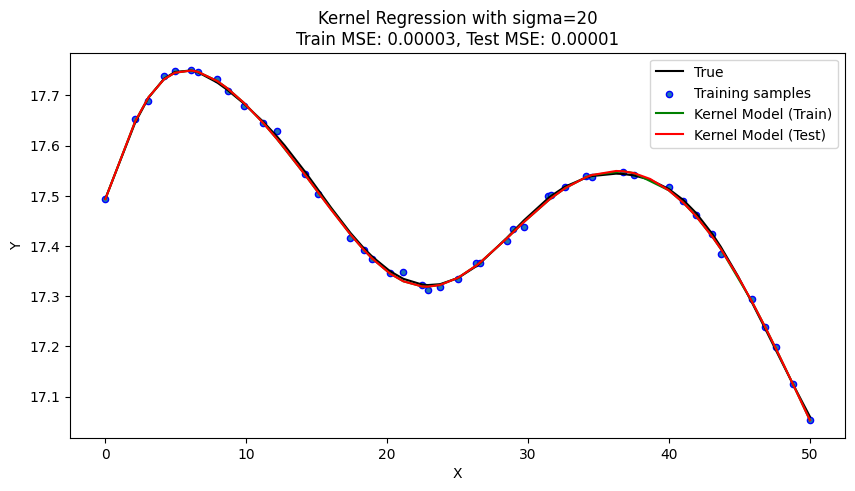

Evaluating for noise2 dataset:
Sigma: 1e-05, Test MSE: 152.45255
Sigma: 2e-05, Test MSE: 152.45255
Sigma: 5e-05, Test MSE: 152.45255
Sigma: 0.0001, Test MSE: 152.45255
Sigma: 0.0002, Test MSE: 152.45255
Sigma: 0.0005, Test MSE: 152.45255
Sigma: 0.001, Test MSE: 152.45255
Sigma: 0.002, Test MSE: 152.45255
Sigma: 0.005, Test MSE: 152.45255
Sigma: 0.01, Test MSE: 152.45255
Sigma: 0.02, Test MSE: 152.45255
Sigma: 0.05, Test MSE: 152.45255
Sigma: 0.1, Test MSE: 152.45255
Sigma: 0.2, Test MSE: 151.92916
Sigma: 0.5, Test MSE: 131.07669
Sigma: 1, Test MSE: 86.68068
Sigma: 2, Test MSE: 12.06459
Sigma: 5, Test MSE: 19046.53959
Sigma: 10, Test MSE: 0.06097
Sigma: 20, Test MSE: 0.00570
Sigma: 50, Test MSE: 0.00162
Sigma: 100, Test MSE: 0.00128
Sigma: 200, Test MSE: 0.00218
Sigma: 500, Test MSE: 0.00279
Sigma: 1000, Test MSE: 0.01224
Sigma: 2000, Test MSE: 0.01220
Sigma: 5000, Test MSE: 0.01383
Sigma: 10000, Test MSE: 0.01383
Sigma: 20000, Test MSE: 0.01384
Sigma: 50000, Test MSE: 0.01396
Sigma: 10

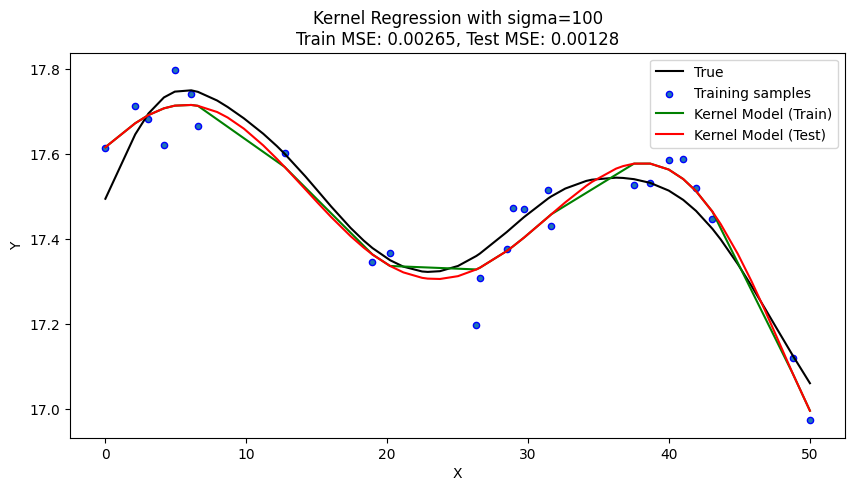

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math as m
import pandas as pd

# Gaussian kernel function
def gaussian_kernel_matrix(x1, x2, sigma):
    gram_matrix = np.zeros((x1.shape[0], x2.shape[0]))
    for i in range(x1.shape[0]):
        for j in range(x2.shape[0]):
            squared_distance = (x1[i] - x2[j])**2
            gram_matrix[i, j] = m.exp(-squared_distance / (2 * sigma**2))
    return gram_matrix

# Function to perform kernel regression and plot results
def kernel_regression_and_plot(X_train, Y_train, X_test, Y_test, sigma):
    gram_matrix_train = gaussian_kernel_matrix(X_train, X_train, sigma)
    pinv_gram_matrix_train = np.linalg.pinv(gram_matrix_train)
    alpha = pinv_gram_matrix_train @ Y_train

    h_train = gram_matrix_train @ alpha
    gram_matrix_test = gaussian_kernel_matrix(X_test, X_train, sigma)
    h_test = gram_matrix_test @ alpha

    mse_train = mean_squared_error(Y_train, h_train)
    mse_test = mean_squared_error(Y_test, h_test)

    plt.figure(figsize=(10, 5))
    plt.plot(X_test, Y_test, 'k', label="True")
    plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
    plt.plot(X_train, h_train, 'g', label="Kernel Model (Train)")
    plt.plot(X_test, h_test, 'r', label="Kernel Model (Test)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Kernel Regression with sigma={sigma}\nTrain MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}")
    plt.legend()
    plt.show()

# Function for hyperparameter search to find the best sigma
def hyperparameter_search_sigma(X_train, Y_train, X_test, Y_test, sigma_values):
    best_sigma = sigma_values[0]
    lowest_mse = float('inf')

    for sigma in sigma_values:
        gram_matrix_train = gaussian_kernel_matrix(X_train, X_train, sigma)
        pinv_gram_matrix_train = np.linalg.pinv(gram_matrix_train)
        alpha = pinv_gram_matrix_train @ Y_train

        gram_matrix_test = gaussian_kernel_matrix(X_test, X_train, sigma)
        h_test = gram_matrix_test @ alpha

        mse_test = mean_squared_error(Y_test, h_test)
        if mse_test < lowest_mse:
            best_sigma = sigma
            lowest_mse = mse_test
        print(f"Sigma: {sigma}, Test MSE: {mse_test:.5f}")

    print(f"Best sigma: {best_sigma}, Lowest Test MSE: {lowest_mse:.5f}")
    return best_sigma

# Load the datasets
DATA_PATH_TRUE = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = '/content/gdrive/My Drive/Colab Notebooks/ML-Cuevas/kernel-methods/DS-5-1-GAP-5-1-N-3_v2.csv'

d_true = pd.read_csv(DATA_PATH_TRUE, header=None)
d_noise1 = pd.read_csv(DATA_PATH_NOISE1, header=None)
d_noise2 = pd.read_csv(DATA_PATH_NOISE2, header=None)

# Prepare the test data
X_test = d_true[0].values.reshape(-1, 1)
Y_test = d_true[1].values.reshape(-1, 1)

# Define sigma values for hyperparameter search
sigma_values = [
    0.00001, 0.00002, 0.00005,
    0.0001, 0.0002, 0.0005,
    0.001, 0.002, 0.005,
    0.01, 0.02, 0.05,
    0.1, 0.2, 0.5,
    1, 2, 5,
    10, 20, 50,
    100, 200, 500,
    1000, 2000, 5000,
    10000, 20000, 50000,
    100000
]

# Function to evaluate different noise datasets
def evaluate_noise_datasets(datasets, X_test, Y_test, sigma_values):
    for label, dataset in datasets.items():
        X_train = dataset[0].values.reshape(-1, 1)
        Y_train = dataset[1].values.reshape(-1, 1)
        print(f"Evaluating for {label} dataset:")
        best_sigma = hyperparameter_search_sigma(X_train, Y_train, X_test, Y_test, sigma_values)
        kernel_regression_and_plot(X_train, Y_train, X_test, Y_test, best_sigma)

# Dictionary of datasets
datasets = {
    'noise1': d_noise1,
    'noise2': d_noise2
}

# Evaluate datasets
evaluate_noise_datasets(datasets, X_test, Y_test, sigma_values)
